In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Loading data

In [2]:
dataset = pd.read_excel("world_happiness.xlsx")
rename_dict = {
    "Year": "Year",
    "Rank": "Rank",
    "Country name": "Country",
    "Ladder score": "Ladder Score",
    "upperwhisker": "Upperwhisker",
    "lowerwhisker": "Lowerwhisker",
    "Explained by: Log GDP per capita": "Log GDP per capita",
    "Explained by: Social support": "Social support",
    "Explained by: Healthy life expectancy": "Healthy life expectancy",
    "Explained by: Freedom to make life choices": "Freedom to make life choices",
    "Explained by: Generosity": "Generosity",
    "Explained by: Perceptions of corruption": "Perceptions of corruption",
    "Dystopia + residual": "Dystopia + residual"
}

dataset = dataset.rename(columns=rename_dict)

2. Exploring dataset

In [3]:
dataset_poland = dataset[dataset["Country"] == "Poland"]
dataset_poland

,Year,Rank,Country,Ladder Score,Upperwhisker,Lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
353,2024,26,Poland,6.6730,6.73400,6.611000,1.666000,1.5950,0.630000,0.790000,0.021000,0.169000,1.802000
1404,2023,35,Poland,6.4420,6.51300,6.370000,1.738000,1.4170,0.639000,0.600000,0.081000,0.175000,1.791000
1405,2022,39,Poland,6.2600,6.34300,6.177000,1.767000,1.4740,0.477000,0.511000,0.120000,0.139000,1.772000
1406,2021,48,Poland,6.1230,6.20500,6.040000,1.758000,1.1740,0.712000,0.523000,0.124000,0.140000,1.693000
1407,2020,45,Poland,6.1660,6.24500,6.087000,1.309000,0.9820,0.668000,0.558000,0.080000,0.130000,2.438000
1408,2019,43,Poland,6.1863,6.25588,6.116719,1.169229,1.3104,0.868038,0.557904,0.063374,0.160541,2.056798
1409,2018,40,Poland,6.1820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1410,2017,42,Poland,6.1230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1411,2016,46,Poland,5.9730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1412,2015,57,Poland,5.8350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dataset_poland.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 353 to 1415
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          13 non-null     int64  
 1   Rank                          13 non-null     int64  
 2   Country                       13 non-null     object 
 3   Ladder Score                  13 non-null     float64
 4   Upperwhisker                  6 non-null      float64
 5   Lowerwhisker                  6 non-null      float64
 6   Log GDP per capita            6 non-null      float64
 7   Social support                6 non-null      float64
 8   Healthy life expectancy       6 non-null      float64
 9   Freedom to make life choices  6 non-null      float64
 10  Generosity                    6 non-null      float64
 11  Perceptions of corruption     6 non-null      float64
 12  Dystopia + residual           6 non-null      float64
dtypes: float

In [5]:
dataset_poland.describe()

,Year,Rank,Ladder Score,Upperwhisker,Lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,13.000000,13.000000,13.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,2017.846154,45.000000,6.106100,6.382647,6.233620,1.567872,1.32540,0.665673,0.589984,0.081562,0.152257,1.925466
std,4.140172,9.192388,0.264153,0.204249,0.217657,0.260885,0.22101,0.127031,0.102844,0.038157,0.018371,0.279591
min,2011.000000,26.000000,5.791000,6.205000,6.040000,1.169229,0.98200,0.477000,0.511000,0.021000,0.130000,1.693000
25%,2015.000000,40.000000,5.835000,6.247720,6.094430,1.398250,1.20810,0.632250,0.531726,0.067531,0.139250,1.776750
50%,2018.000000,45.000000,6.123000,6.299440,6.146860,1.702000,1.36370,0.653500,0.557952,0.080500,0.150271,1.796500
75%,2021.000000,51.000000,6.186300,6.470500,6.321750,1.753000,1.45975,0.701000,0.589500,0.110250,0.166885,1.993098
max,2024.000000,60.000000,6.673000,6.734000,6.611000,1.767000,1.59500,0.868038,0.790000,0.124000,0.175000,2.438000


3. Comparative Analysis of the Happiness Dataset for Poland

In [6]:
years = dataset_poland["Year"]
ladder_score = dataset_poland["Ladder Score"]

3.1 Happiness Over the Years

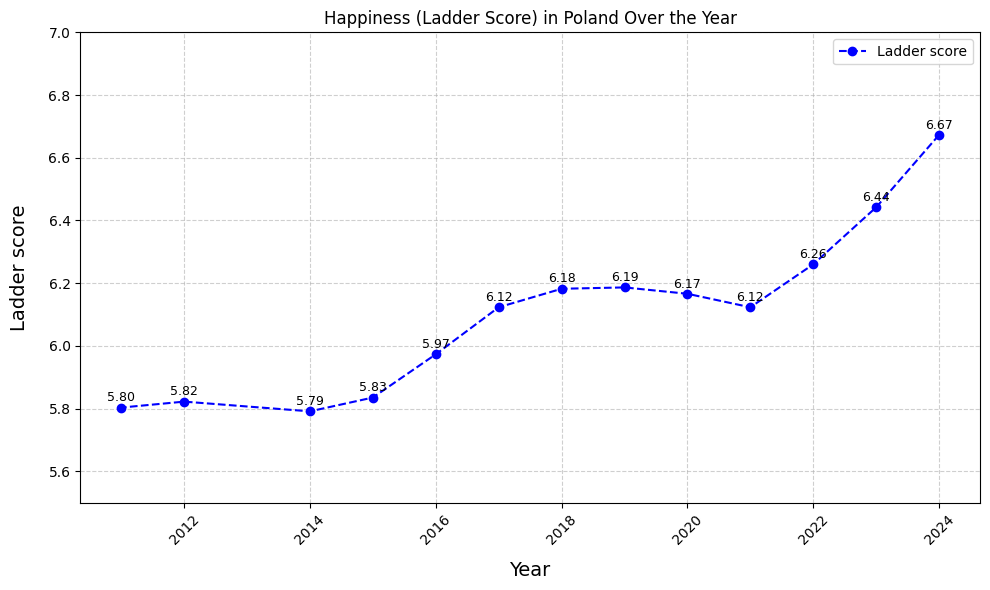

In [7]:
plt.figure(figsize=(10, 6))
for x, y in zip(years, ladder_score):
    plt.text(x, y + 0.02, f"{y:.2f}", ha='center', fontsize=9)
plt.plot(years, ladder_score, label="Ladder score", color='blue', marker='o', linestyle='--')

plt.xlabel("Year", fontsize=14, labelpad=10)
plt.xticks(rotation=45)
plt.ylim(5.5, 7)
plt.ylabel("Ladder score", fontsize=14, labelpad=14)
plt.title("Happiness (Ladder Score) in Poland Over the Year")

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()

3.2 Poland’s Position Among All Countries in the Happiness Ranking

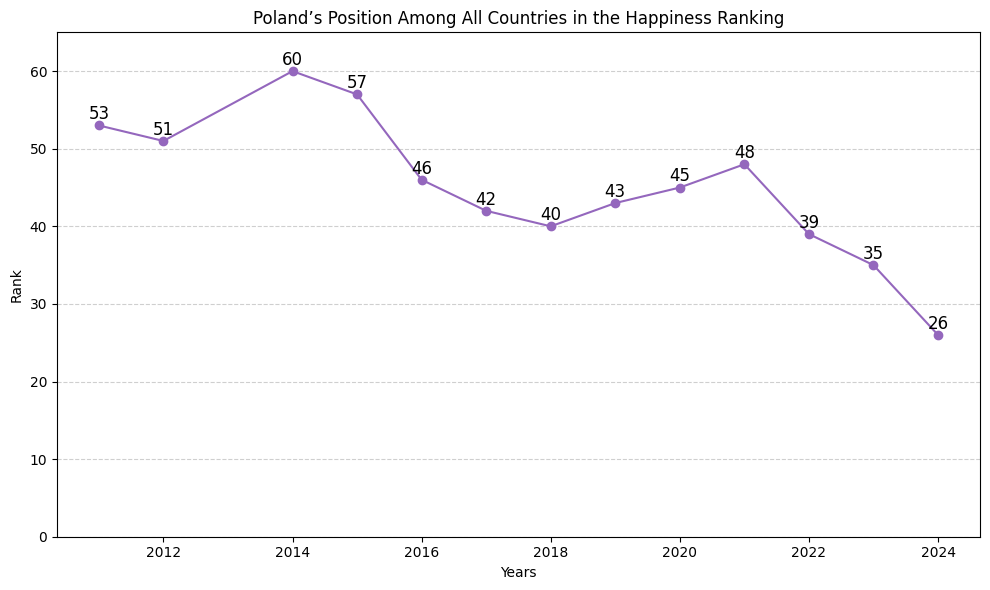

In [8]:
plt.figure(figsize=(10, 6))
for x, y in zip(years, dataset_poland["Rank"]):
    plt.text(x, y + 0.8, y, ha='center', fontsize=12)
plt.plot(years, dataset_poland["Rank"], label="Ladder score", color='#9467bd', marker='o')

plt.xlabel("Years")
plt.ylabel("Rank")
plt.ylim(0, 65)
plt.title("Poland’s Position Among All Countries in the Happiness Ranking")

plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

3.3 Correlation Between Happiness and Other Variables

In [9]:
dataset_corr = dataset[["Ladder Score", "Log GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity", "Perceptions of corruption", "Dystopia + residual"]]
dataset_corr = dataset_corr.corr(numeric_only=True)
dataset_corr

,Ladder Score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
Ladder Score,1.000000,0.688715,0.685377,0.657329,0.541374,0.044164,0.431703,0.414134
Log GDP per capita,0.688715,1.000000,0.616283,0.513527,0.449675,-0.221298,0.374376,-0.208681
Social support,0.685377,0.616283,1.000000,0.521806,0.529245,-0.088037,0.201784,-0.154532
Healthy life expectancy,0.657329,0.513527,0.521806,1.000000,0.259832,-0.016826,0.332371,0.010723
Freedom to make life choices,0.541374,0.449675,0.529245,0.259832,1.000000,0.018642,0.332829,-0.107262
Generosity,0.044164,-0.221298,-0.088037,-0.016826,0.018642,1.000000,0.146490,0.123299
Perceptions of corruption,0.431703,0.374376,0.201784,0.332371,0.332829,0.146490,1.000000,-0.043134
Dystopia + residual,0.414134,-0.208681,-0.154532,0.010723,-0.107262,0.123299,-0.043134,1.000000


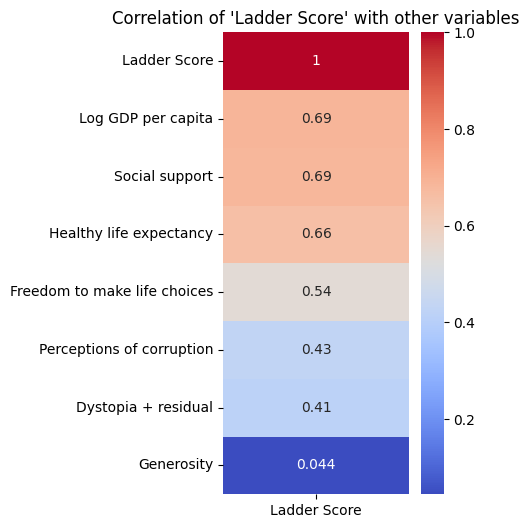

In [10]:
single_corr = dataset_corr[["Ladder Score"]].sort_values(by="Ladder Score", ascending=False)

plt.figure(figsize=(3, 6))
sns.heatmap(single_corr, annot=True, cmap="coolwarm")
plt.title("Correlation of 'Ladder Score' with other variables")
plt.show()

3.4 Relationship Between Social Support and Happiness in Poland

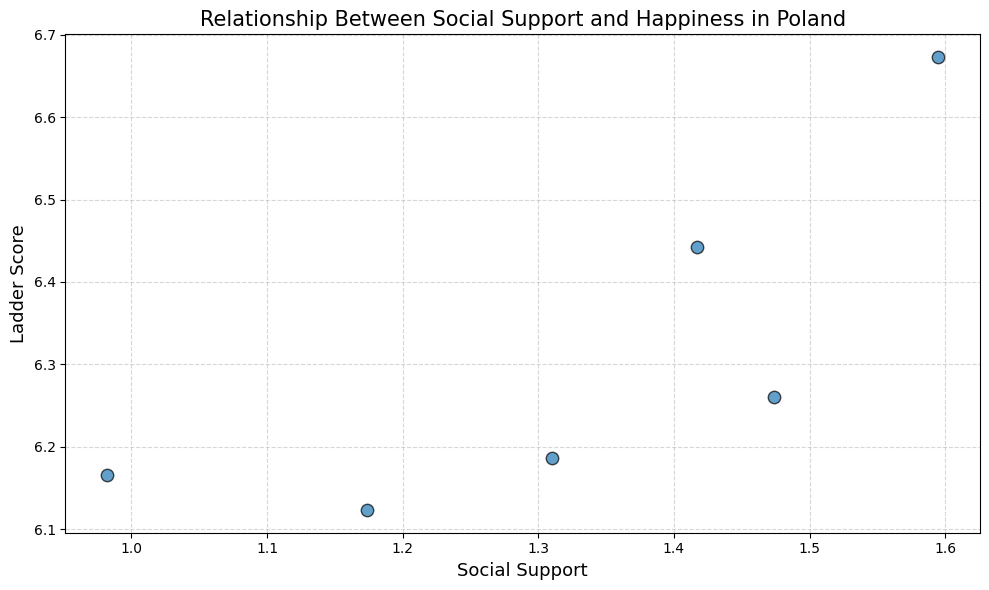

In [11]:
plt.figure(figsize=(10, 6))

plt.scatter(
    dataset_poland["Social support"],
    dataset_poland["Ladder Score"],
    color="#1f77b4",
    alpha=0.7,
    edgecolor="black",
    s=80
)

plt.xlabel("Social Support", fontsize=13)
plt.ylabel("Ladder Score", fontsize=13)
plt.title("Relationship Between Social Support and Happiness in Poland", fontsize=15)

plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

3.5 Relationship Between Social Support and Happiness in Poland

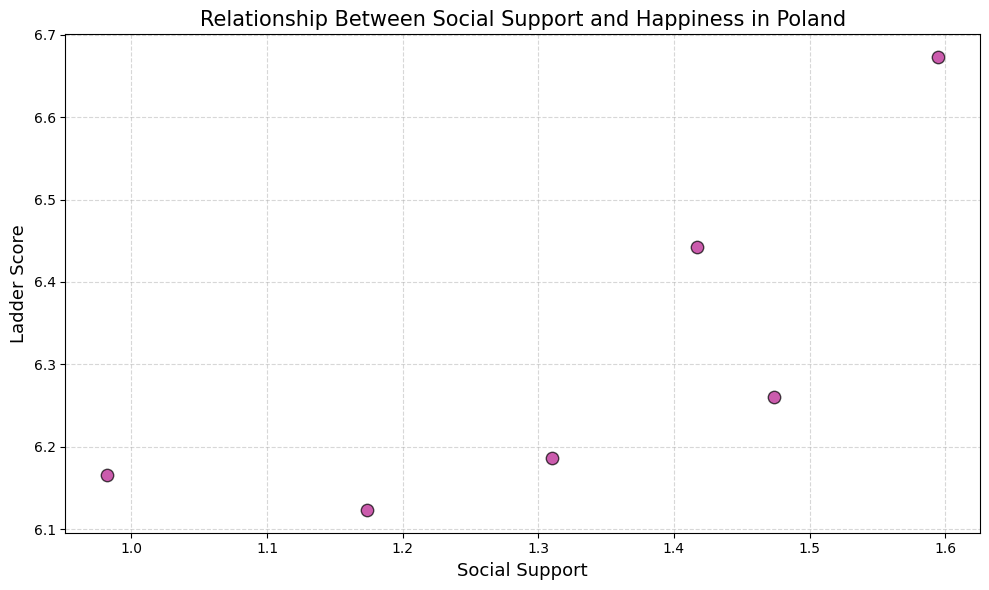

In [12]:
plt.figure(figsize=(10, 6))

plt.scatter(
    dataset_poland["Social support"],
    dataset_poland["Ladder Score"],
    color="#b5178b",
    alpha=0.7,
    edgecolor="black",
    s=80
)

plt.xlabel("Social Support", fontsize=13)
plt.ylabel("Ladder Score", fontsize=13)
plt.title("Relationship Between Social Support and Happiness in Poland", fontsize=15)

plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

4. Poland happiness in comparison with countries in the EU

4.1 First year in dataset: 2012

In [13]:
euro_countries = ["Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta", "Netherlands", "Poland", "Portugal", "Romania", "Slovenia", "Spain", "Sweden"]

In [14]:
dataset_2012 = dataset[(dataset["Year"] == 2012) & (dataset["Country"].isin(euro_countries))]
dataset_2012

,Year,Rank,Country,Ladder Score,Upperwhisker,Lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
95,2012,8,Austria,7.369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,2012,21,Belgium,6.967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,2012,144,Bulgaria,3.981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
426,2012,58,Croatia,5.661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
440,2012,34,Cyprus,6.466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
453,2012,39,Czechia,6.290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
466,2012,1,Denmark,7.693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
545,2012,72,Estonia,5.426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
574,2012,7,Finland,7.389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
587,2012,25,France,6.764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


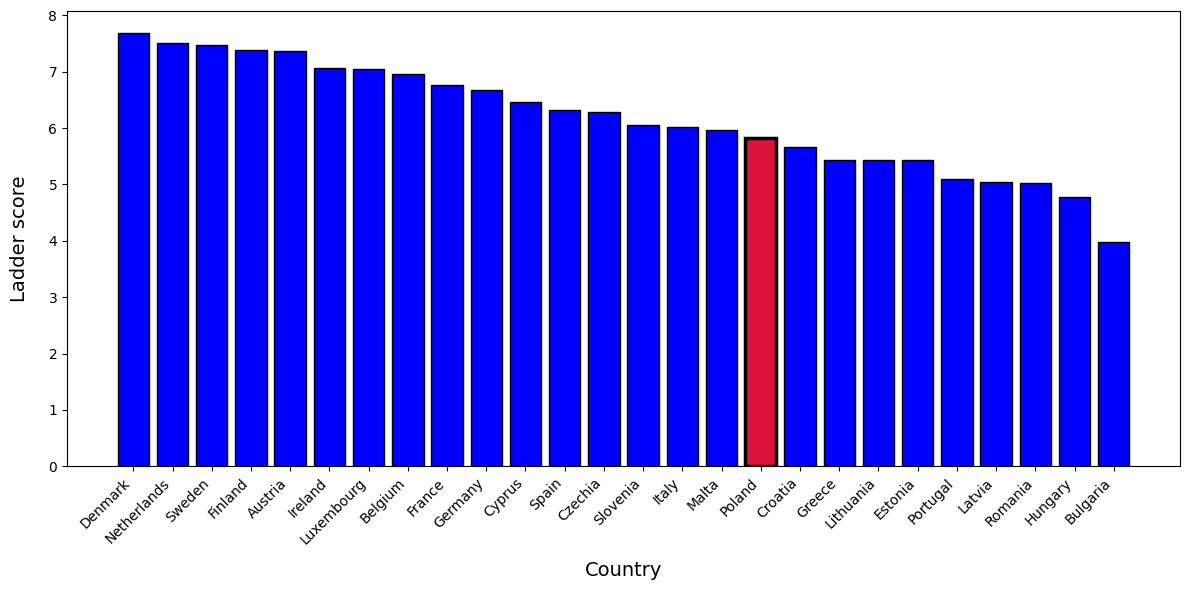

In [15]:
countries = list(dataset_2012["Country"])
scores = list(dataset_2012["Ladder Score"])
highlight = "Poland"

sorted_data = sorted(zip(scores, countries), reverse=True)  # sorts by score
scores_sorted, countries_sorted = zip(*sorted_data)

colors = ['blue' if country != highlight else 'crimson' for country in countries_sorted]

plt.figure(figsize=(12, 6))
bars = plt.bar(countries_sorted, scores_sorted, color=colors, edgecolor='black')

for bar, country in zip(bars, countries_sorted):
    if country == highlight:
        bar.set_linewidth(2.5)
        bar.set_edgecolor('black')

plt.xlabel("Country",  fontsize=14, labelpad=10)
plt.ylabel("Ladder score", fontsize=14, labelpad=14)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

4.2 Last year in dataset: 2024

In [16]:
dataset_2024 = dataset[(dataset["Year"] == 2024) & (dataset["Country"].isin(euro_countries))]
dataset_2024

,Year,Rank,Country,Ladder Score,Upperwhisker,Lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,2024,1,Finland,7.736,7.810,7.662,1.749,1.783,0.824,0.986,0.110,0.502,1.782
13,2024,2,Denmark,7.521,7.611,7.431,1.825,1.748,0.820,0.955,0.150,0.488,1.535
45,2024,4,Sweden,7.345,7.427,7.262,1.783,1.698,0.889,0.952,0.170,0.467,1.385
58,2024,5,Netherlands,7.306,7.372,7.240,1.822,1.667,0.844,0.860,0.186,0.344,1.583
109,2024,9,Luxembourg,7.122,7.213,7.031,2.028,1.558,0.864,0.931,0.117,0.397,1.227
181,2024,14,Belgium,6.910,6.974,6.845,1.783,1.646,0.852,0.895,0.119,0.306,1.309
194,2024,15,Ireland,6.889,6.977,6.801,1.988,1.659,0.823,0.906,0.179,0.382,0.952
207,2024,16,Lithuania,6.829,6.912,6.746,1.684,1.699,0.592,0.702,0.031,0.123,1.998
220,2024,17,Austria,6.810,6.891,6.728,1.791,1.592,0.814,0.856,0.179,0.280,1.297
246,2024,19,Slovenia,6.792,6.889,6.695,1.692,1.718,0.802,0.961,0.121,0.113,1.384


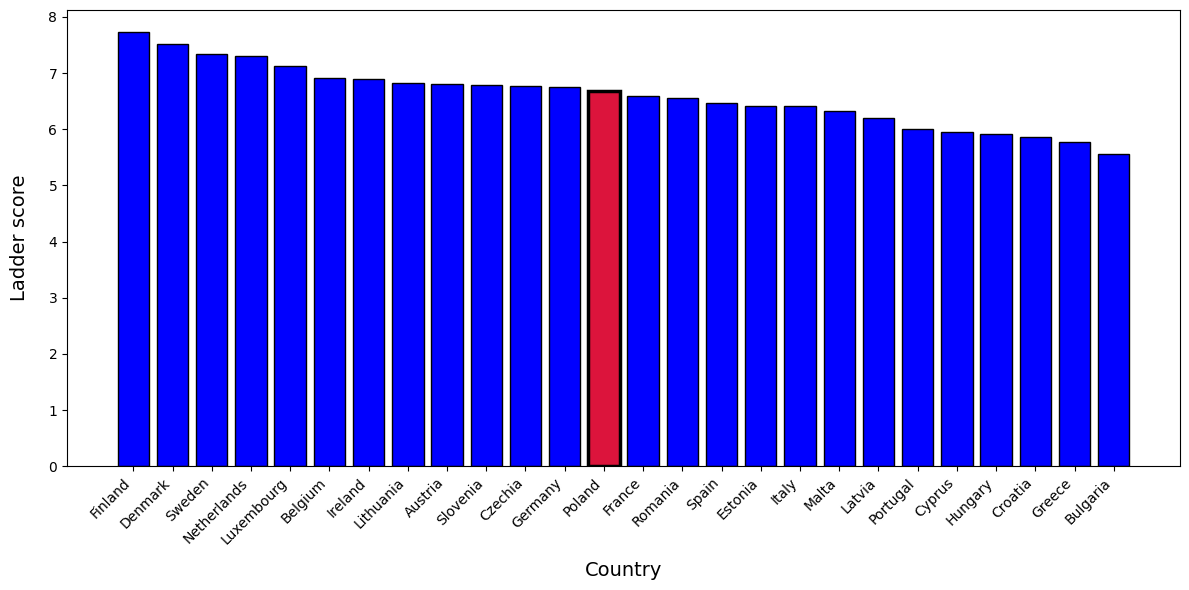

In [ ]:
countries = list(dataset_2024["Country"])
scores = list(dataset_2024["Ladder Score"])
highlight = "Poland"

colors = ['blue' if country != highlight else 'crimson' for country in countries]

plt.figure(figsize=(12, 6))
bars = plt.bar(countries, scores, color=colors, edgecolor='black')

for bar, country in zip(bars, countries):
    if country == highlight:
        bar.set_linewidth(2.5)
        bar.set_edgecolor('black')

plt.xlabel("Country",  fontsize=14, labelpad=10)
plt.ylabel("Ladder score", fontsize=14, labelpad=14)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show() 